<a href="https://colab.research.google.com/github/Carr-23/ML-Attraction/blob/main/SorC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# What to improve on:

*   Use OpenCV to detect faces and crop around them, this will give us better data since it can ignore the backgrounds and it is only focused on the faces, additionally this will allow us to have more pixels/facial feature.



In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Get the dataset from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataSet = [
           'stronk',
           'chonk'
]

### Formate the data to be in proper alphabetical order (google drives system is different to windows)

In [ ]:
import os
import json
import re

def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(data, key=alphanum_key)

files = sorted_alphanumeric(os.listdir('drive/MyDrive/selfies/'))

with open('drive/MyDrive/yValues.json') as f:
  filesY = json.load(f)

### Get the images data and resize them, add the images to numpy array

In [ ]:
xData = np.zeros(shape=(len(filesY),360,240,3))
yData = filesY

In [ ]:
count = -1
for file in files:
  count +=1
  try:
    img = Image.open('drive/MyDrive/selfies/'+ file).convert('RGB')
  except:
    continue
  img.load()
  img = img.resize((240,360),Image.ANTIALIAS)
  data = np.asarray(img, dtype="int" )
  try:
    xData[count] = data
  except:
    print(data.shape)
    print(data[2].shape)
    print(data[2][1].shape)
    print(data[2][1][3])
    for x in range(len(data[2])):
      data[2][x] = np.delete(data[2][x],3,0)
    xData[count] = data
  yData[count] = (filesY[count])
  img.close()

In [ ]:
xData.shape

(931, 360, 240, 3)

In [ ]:
xData.max()

255.0

In [ ]:
print(yData)

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 

### Split that data

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.3, random_state = 42)

### Noramlize Data

In [ ]:
xTrain = xTrain/255.0
xTest = xTest/255.0

In [ ]:
yTrain = np.array(yTrain)
yTest = np.array(yTest)

In [ ]:
print(yTest.shape)
print(yTrain.shape)
print(xTest.shape)
print(xTrain.shape)

(280,)
(651,)
(280, 360, 240, 3)
(651, 360, 240, 3)


# CNN Model for Binary Clasification

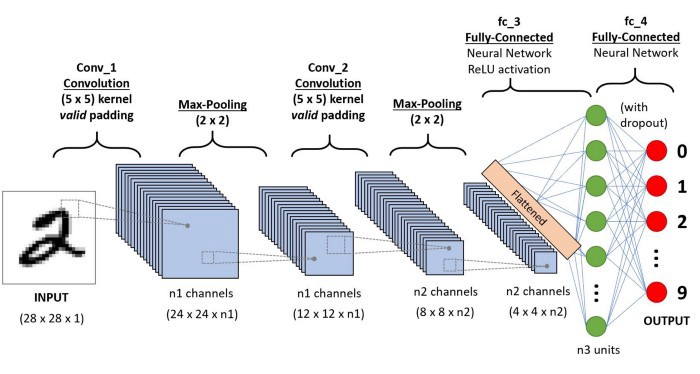

In [ ]:
model = Sequential()

Padding = same when not cut to face

In [ ]:
# Input layer
# First Convolution layer
model.add(Conv2D(filters=64, kernel_size=(5,5),padding='same',activation='relu',input_shape = [360,240,3]))

# First Max-Pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides = 2, padding='valid'))

# Second convolution layer
model.add(Conv2D(filters=128, kernel_size =(5,5), padding='same', activation='relu'))

# Second Max-Pooling layer
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Dropout 50% of neuron
model.add(Dropout(0.5))

# Flatten everything
model.add(Flatten())

# Output Layer
#model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 360, 240, 64)      4864      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 180, 120, 64)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 180, 120, 128)     204928    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 90, 60, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 90, 60, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 691200)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(xTrain,yTrain,batch_size=1,epochs=15,verbose=1,validation_data=(xTest,yTest))

Epoch 1/15
651/651 [==============================] - 334s 513ms/step - loss: 0.7982 - accuracy: 0.6836 - val_loss: 0.6505 - val_accuracy: 0.6786
Epoch 2/15
651/651 [==============================] - 338s 519ms/step - loss: 0.7364 - accuracy: 0.6774 - val_loss: 0.6498 - val_accuracy: 0.6643
Epoch 3/15
651/651 [==============================] - 338s 519ms/step - loss: 0.7464 - accuracy: 0.6989 - val_loss: 0.6738 - val_accuracy: 0.6786
Epoch 4/15
651/651 [==============================] - 340s 522ms/step - loss: 0.5804 - accuracy: 0.7281 - val_loss: 0.8219 - val_accuracy: 0.6179
Epoch 5/15
651/651 [==============================] - 338s 519ms/step - loss: 0.5204 - accuracy: 0.7619 - val_loss: 0.9142 - val_accuracy: 0.6179
Epoch 6/15
651/651 [==============================] - 339s 521ms/step - loss: 0.3627 - accuracy: 0.8356 - val_loss: 0.9735 - val_accuracy: 0.6500
Epoch 7/15
651/651 [==============================] - 340s 522ms/step - loss: 0.3514 - accuracy: 0.8495 - val_loss: 0.8604 -

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

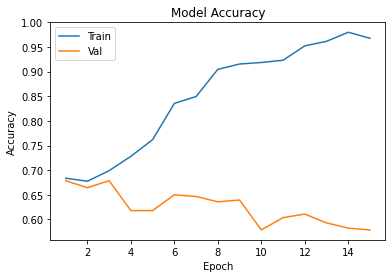

In [ ]:
# Plot Training & Validation Accuracy Values
epoch_range = range(1,16)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
yPred = model.predict_classes(xTest)
print('')
accuracy_score(yTest,yPred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.5785714285714286

In [ ]:
yPred[21]

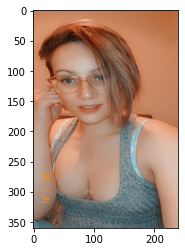

In [ ]:
plt.imshow(xTest[21])



> So the model turned out ok, it went really bad near the end of the fitting because it was over fitting, however, it was still above 50%.

> I am now going to try to use OpenCV to detect the face and be able to crop it more.




In [ ]:
yPred

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    